Dataset keys: ['info', 'images', 'annotations', 'categories', 'splits']
Annotations keys: ['pieces', 'corners']
Found 223804 total pieces
Found 10800 images with pieces
Found corners for 2078 images
Successfully processed 10800 images
Saved matrix data for 10800 images to training_inputs\matrices

Image ID: 0 | Filename: G000_IMG000.jpg
Presence Matrix (original):
 [[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
Presence Matrix (inverted for saving):
 [[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
Piece Type Matrix (original):
 [[ 7  8  9 10 11  9  8  7]
 [ 6  6  6  6  6  6  6  6]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [ 0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  3  2  1]]
Piece Type Matrix (inverted for saving

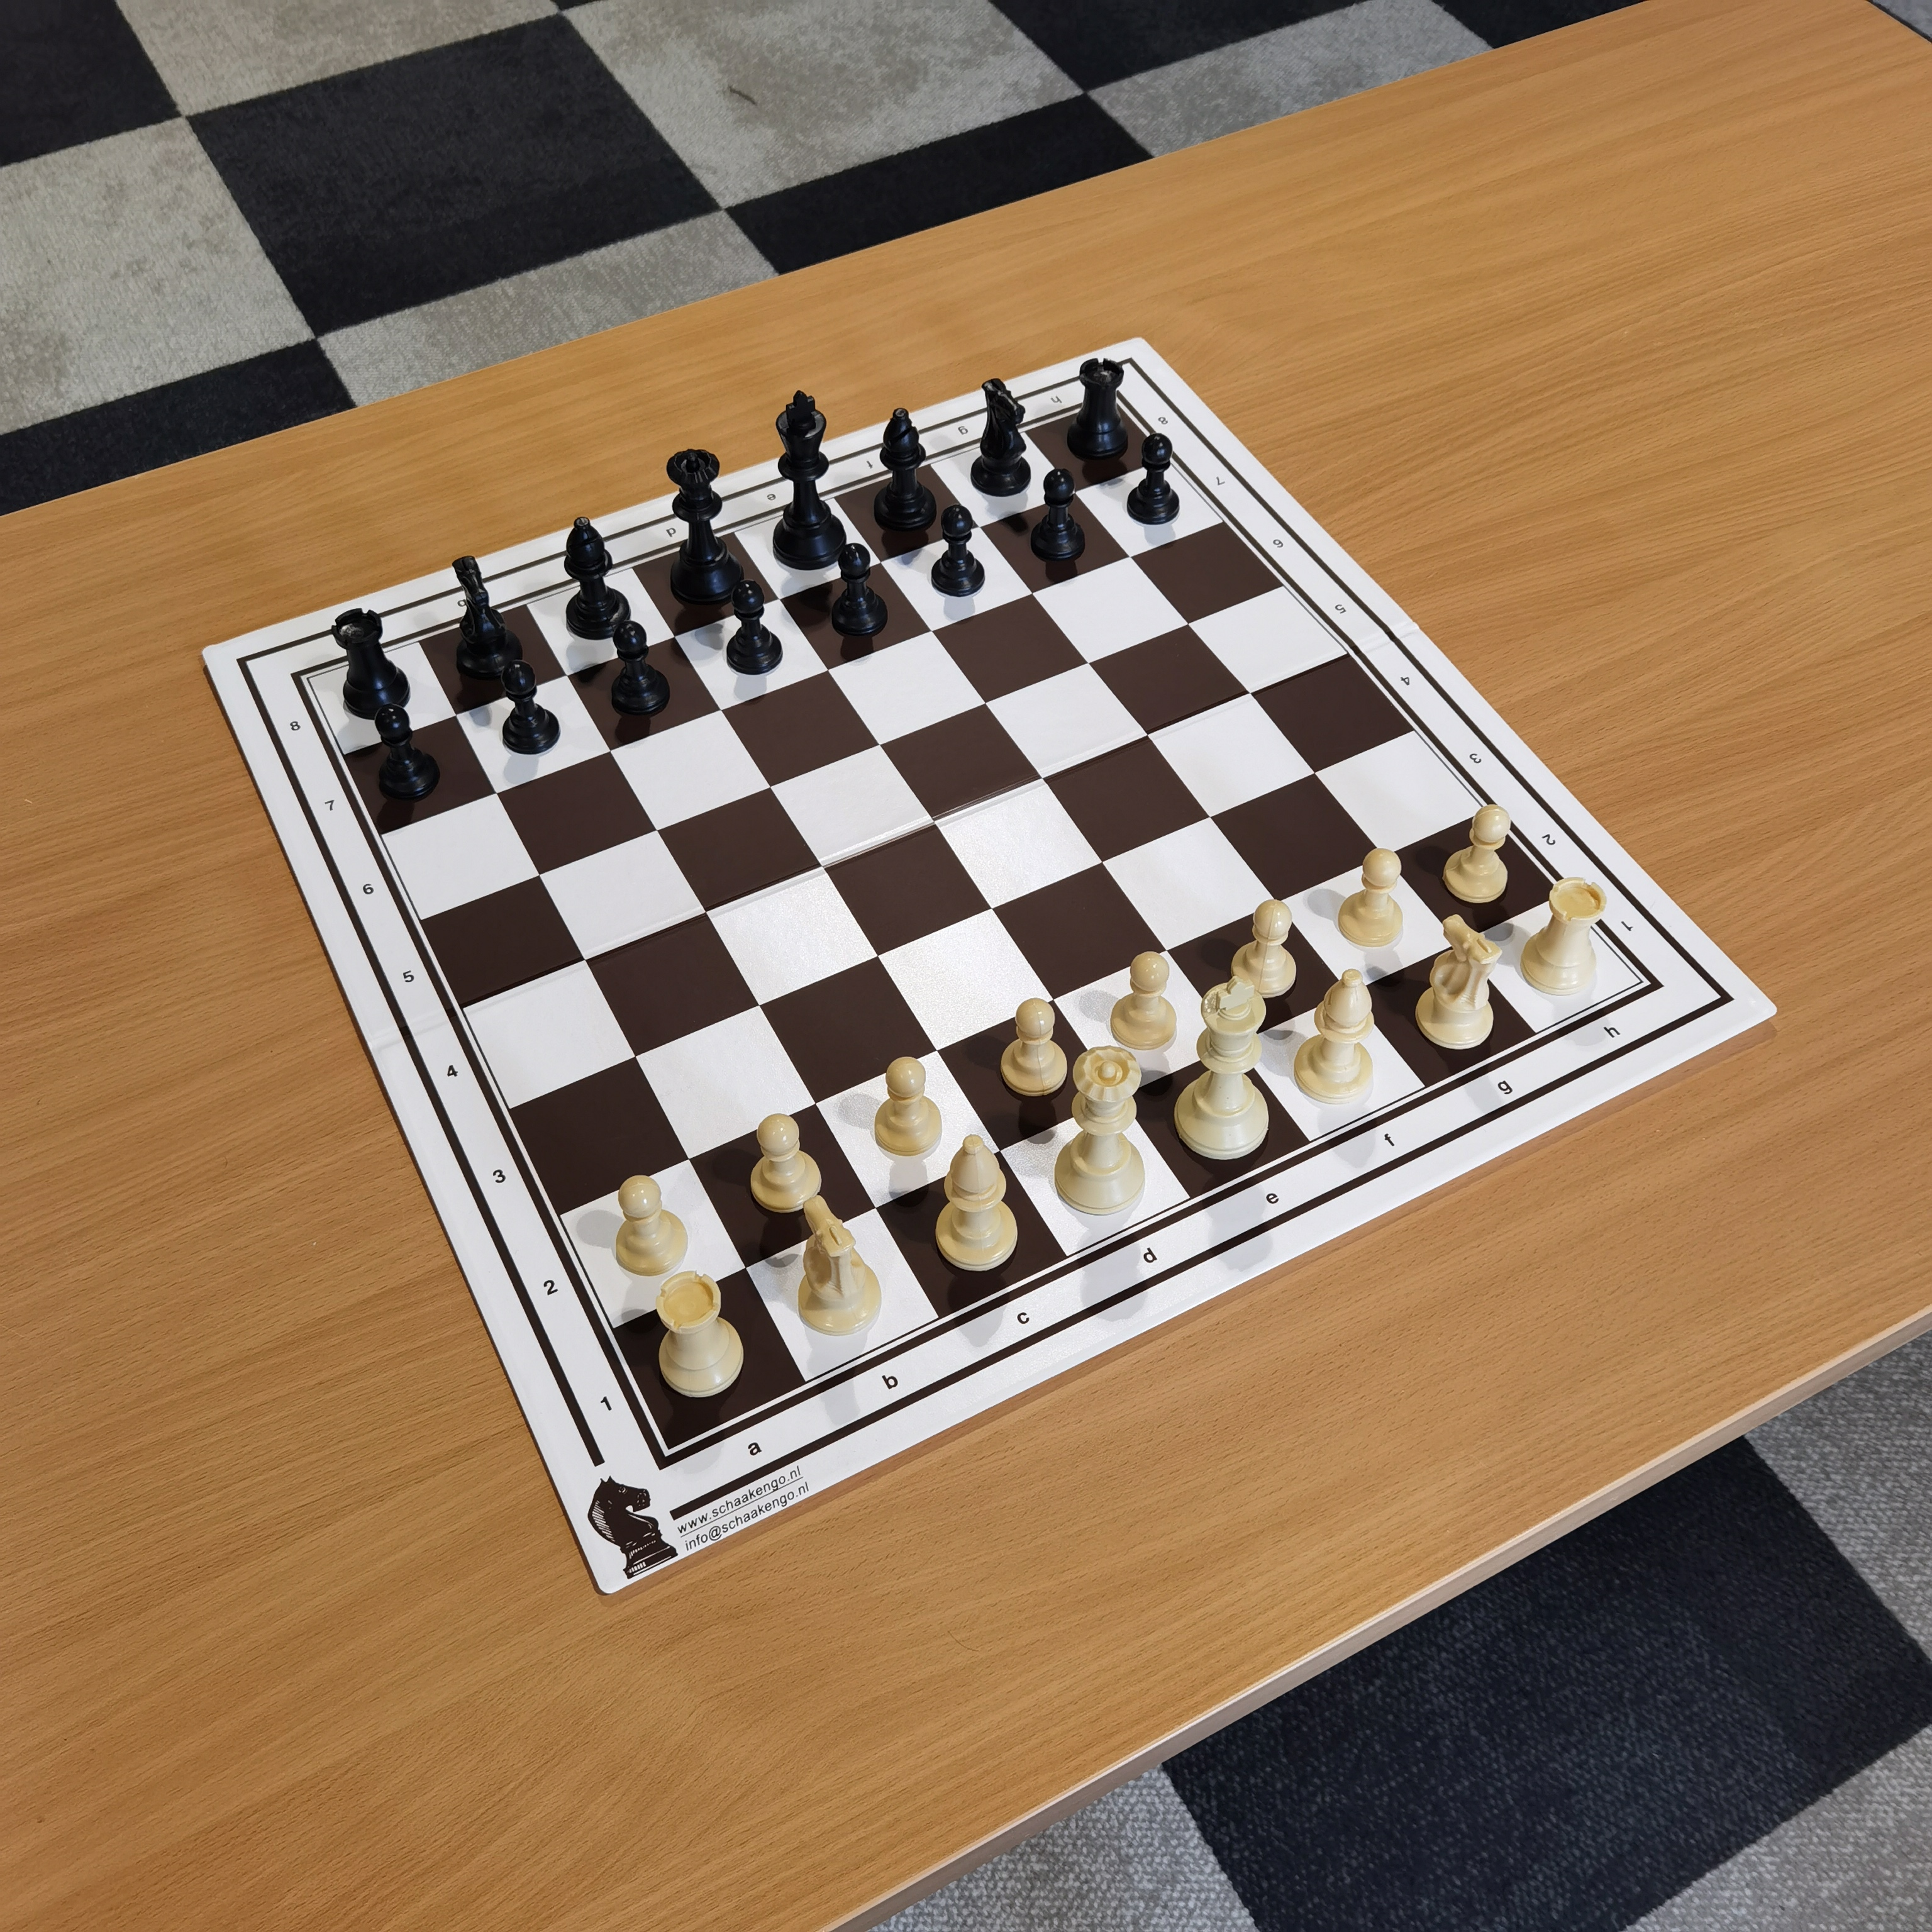


Image ID: 1 | Filename: G000_IMG001.jpg
Presence Matrix (original):
 [[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
Presence Matrix (inverted for saving):
 [[1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
Piece Type Matrix (original):
 [[ 7  8  9 10 11  9  8  7]
 [ 6  6  6  6  6  6  6  6]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12  0 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [ 0 12  0  0  0  0  0  0]
 [ 1  2  3  4  5  3  2  1]]
Piece Type Matrix (inverted for saving):
 [[ 1  2  3  4  5  3  2  1]
 [ 0 12  0  0  0  0  0  0]
 [12 12 12 12 12 12 12 12]
 [12  0 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [ 6  6  6  6  6  6  6  6]
 [ 7  8  9 10 11  9  8  7]]
Corners:
 {'top_right': [892.9, 931.7], 'bottom_right': [2376.27, 994.8], 'bo

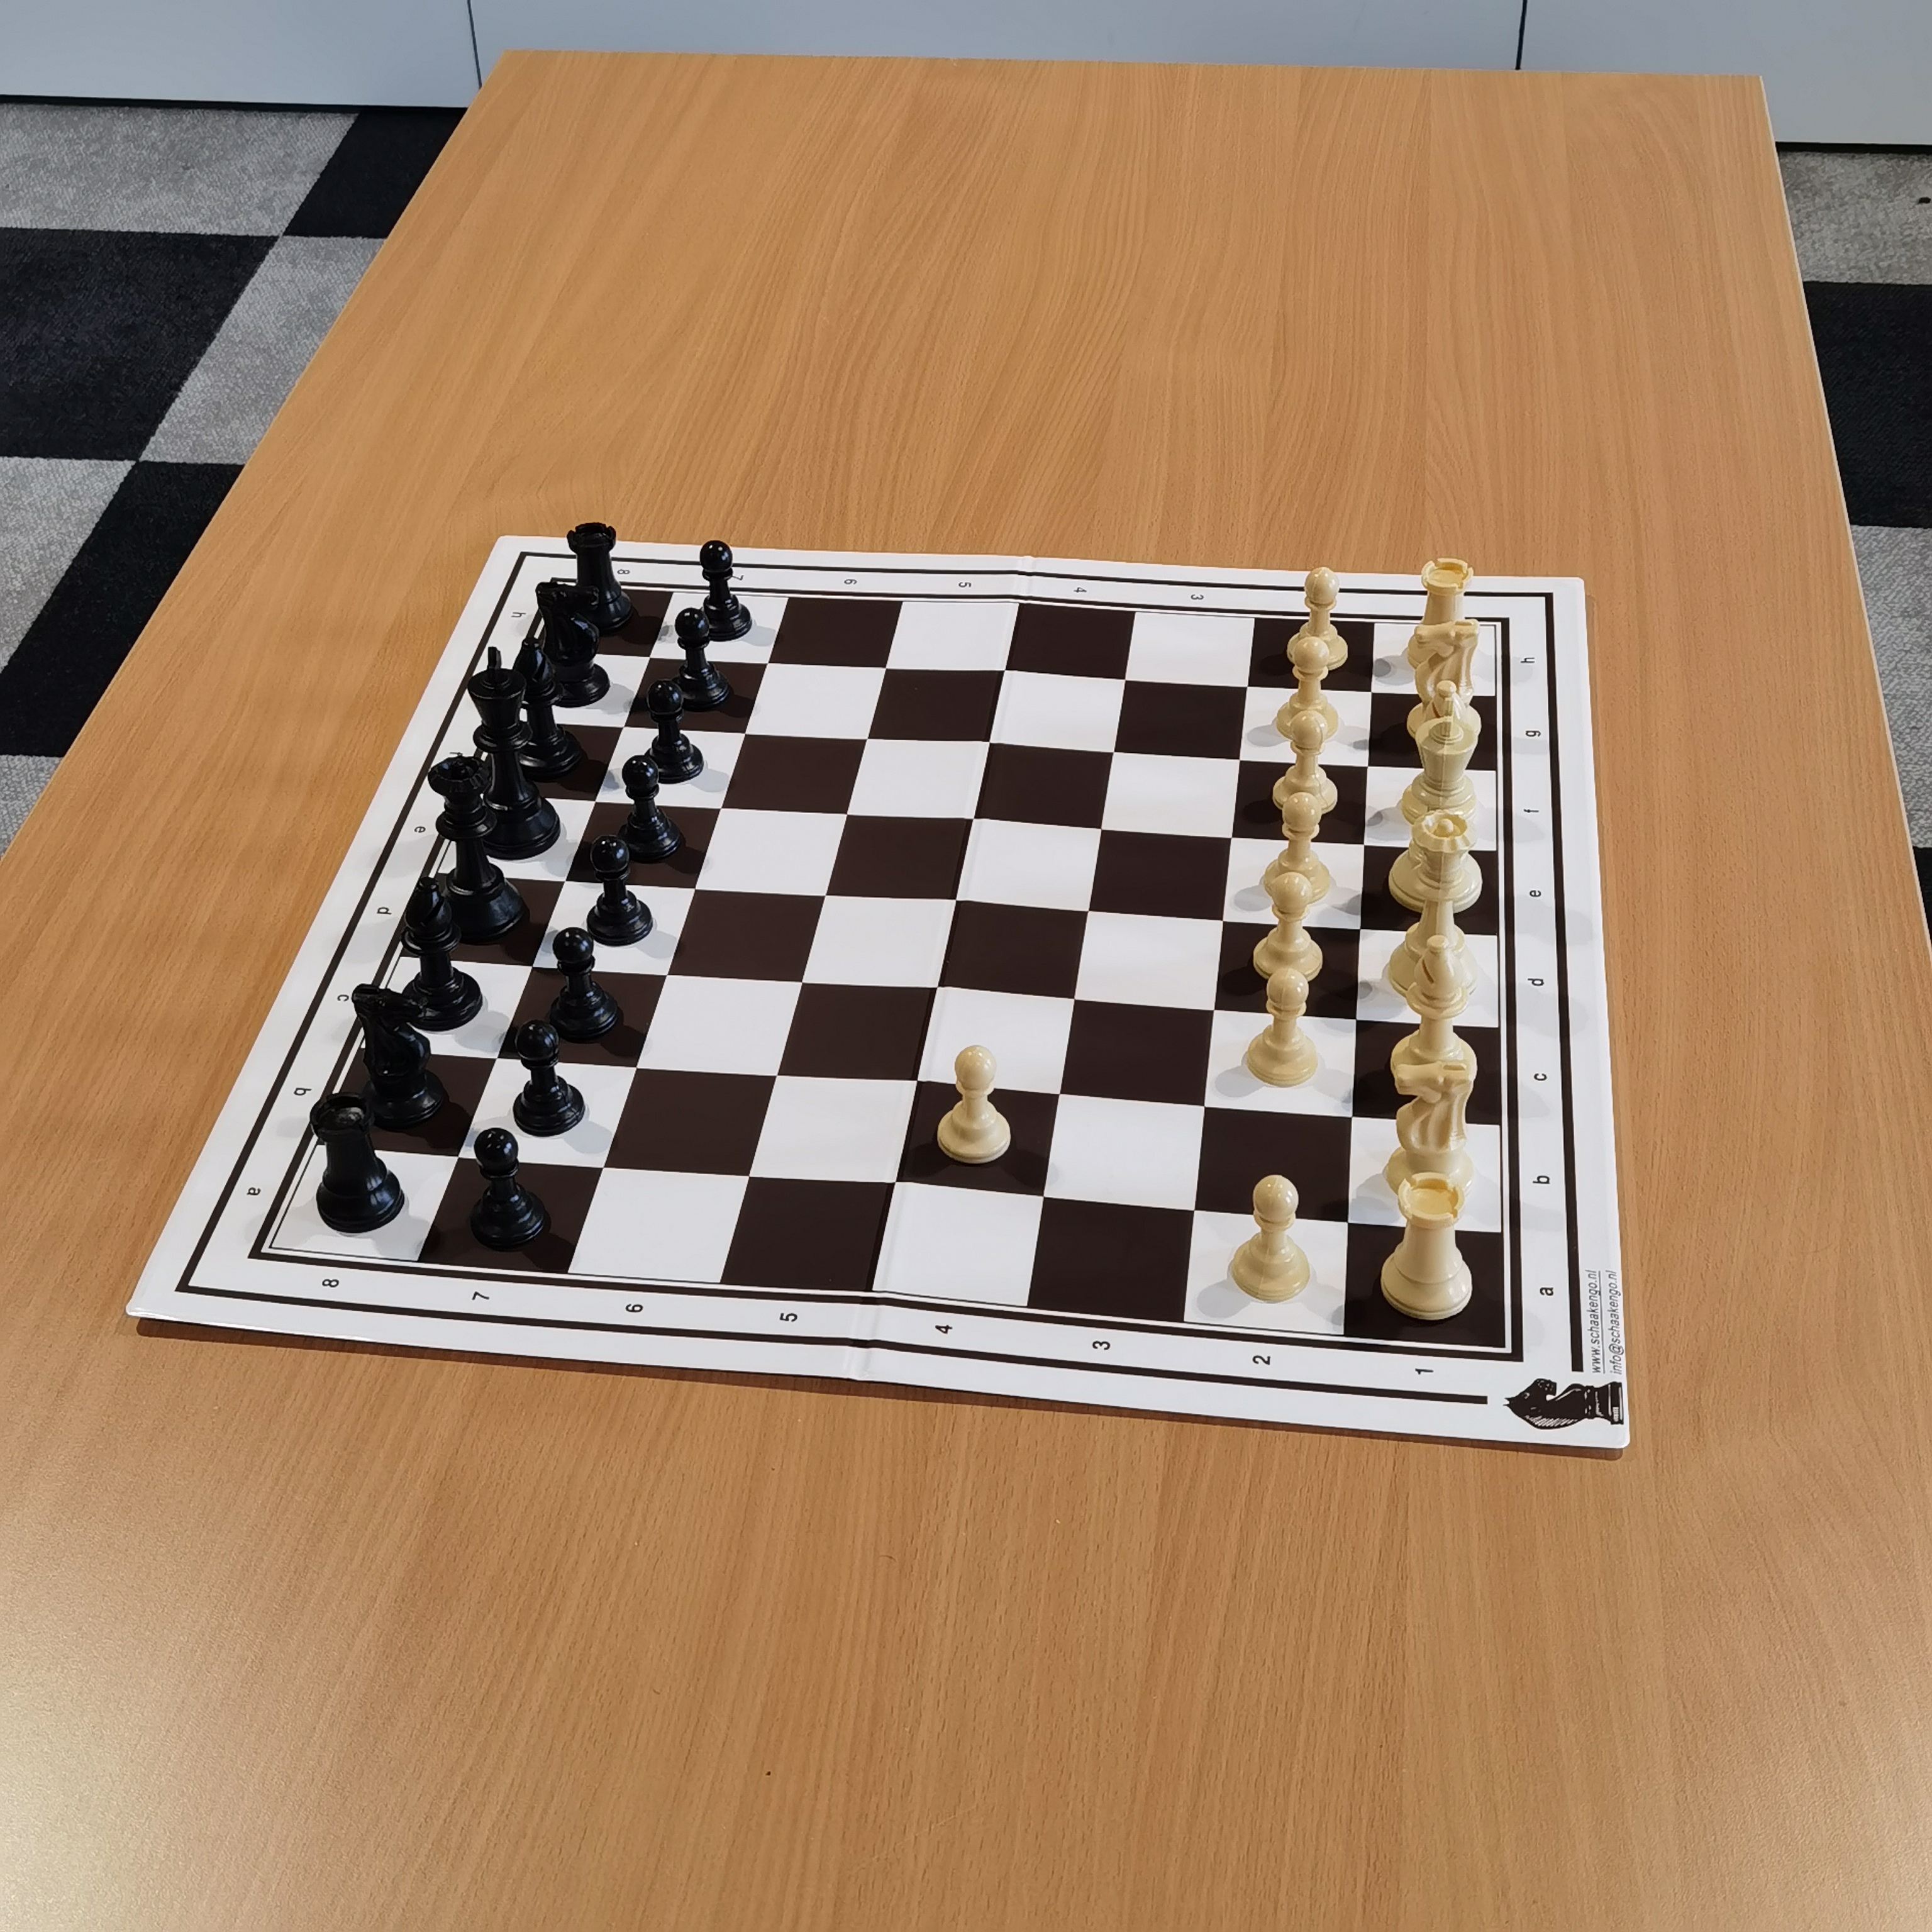

In [1]:
import numpy as np
import json
import os
import re
from IPython.display import Image, display

def chess_position_to_indices(chess_pos):
    """Convert chess notation like 'e4' to matrix indices."""
    if isinstance(chess_pos, str) and len(chess_pos) == 2:
        column = ord(chess_pos[0].lower()) - ord('a')  # 'a' -> 0, ..., 'h' -> 7
        row = 8 - int(chess_pos[1])  # '1' -> 7, ..., '8' -> 0
        return row, column
    else:
        raise ValueError(f"Invalid chess position format: {chess_pos}")

def create_matrices_per_image(annotations_file):
    if not os.path.exists(annotations_file):
        print(f"Error: File '{annotations_file}' not found. Current working directory: {os.getcwd()}")
        return {}

    with open(annotations_file, 'r') as f:
        dataset = json.load(f)

    board_size = 8
    results = {}

    print(f"Dataset keys: {list(dataset.keys())}")
    if "annotations" in dataset:
        print(f"Annotations keys: {list(dataset['annotations'].keys())}")

    pieces = []
    corners_data = []
    if "annotations" in dataset and isinstance(dataset["annotations"], dict):
        pieces = dataset["annotations"].get("pieces", [])
        corners_data = dataset["annotations"].get("corners", [])
        print(f"Found {len(pieces)} total pieces")

    image_to_pieces = {}
    for piece in pieces:
        image_id = piece.get("image_id")
        if image_id not in image_to_pieces:
            image_to_pieces[image_id] = []
        image_to_pieces[image_id].append(piece)

    print(f"Found {len(image_to_pieces)} images with pieces")

    # Create a lookup for corners: image_id => corners dict
    image_to_corners = {}
    if isinstance(corners_data, list):
        for corner_entry in corners_data:
            if isinstance(corner_entry, dict):
                image_id = corner_entry.get("image_id")
                if image_id is not None:
                    image_to_corners[image_id] = corner_entry.get("corners", {})
    elif isinstance(corners_data, dict):
        for corner_id, corner_entry in corners_data.items():
            if isinstance(corner_entry, dict):
                image_id = corner_entry.get("image_id")
                if image_id is not None:
                    image_to_corners[image_id] = corner_entry.get("corners", {})
                        
    print(f"Found corners for {len(image_to_corners)} images")

    for image in dataset.get("images", []):
        image_id = image.get("id")
        filename = image.get("file_name")

        presence_matrix = np.zeros((board_size, board_size), dtype=int)
        piece_type_matrix = np.full((board_size, board_size), 12, dtype=int)  # 12 = empty

        if image_id in image_to_pieces:
            for piece in image_to_pieces[image_id]:
                chessboard_pos = piece.get("chessboard_position")
                piece_id = piece.get("category_id", 12)

                try:
                    row, col = chess_position_to_indices(chessboard_pos)
                    if 0 <= row < board_size and 0 <= col < board_size:
                        if piece_id != 12:
                            presence_matrix[row, col] = 1
                        piece_type_matrix[row, col] = piece_id
                    else:
                        print(f"[{filename}] Position out of bounds: {chessboard_pos} -> ({row}, {col})")
                except Exception as e:
                    print(f"[{filename}] Invalid position: {chessboard_pos} ({e})")

        # 🆕 Include corners if available
        corners_for_image = image_to_corners.get(image_id, {})

        results[image_id] = {
            "file_name": filename,
            "image_id": image_id,
            "presence_matrix": presence_matrix,
            "piece_type_matrix": piece_type_matrix,
            "corners": corners_for_image
        }

    return results

# Output paths
training_dir = "training_inputs"
matrices_dir = os.path.join(training_dir, "matrices")
os.makedirs(matrices_dir, exist_ok=True)

annotations_file = "annotations.json"
image_matrices = create_matrices_per_image(annotations_file)

if not image_matrices:
    print("No results returned. Please check the file path and JSON structure.")
else:
    print(f"Successfully processed {len(image_matrices)} images")
    failed_images = []

    for img_id, data in image_matrices.items():
        if img_id is None:
            continue

        filename_without_ext = os.path.splitext(data['file_name'])[0]

        try:
            inverted_presence = np.flipud(data['presence_matrix']).tolist()
            inverted_piece_type = np.flipud(data['piece_type_matrix']).tolist()

            matrix_data = {
                "presence_matrix": inverted_presence,
                "piece_type_matrix": inverted_piece_type,
                "piece_count": int(np.sum(data['presence_matrix'])),
                "file_name": data['file_name'],
                "image_id": data['image_id'],
                "corners": data.get("corners", {}),  # 🆕 Include corners in output
            }

            def format_matrix_arrays(obj):
                json_str = json.dumps(obj, indent=2)

                def compact_matrix(match):
                    matrix_name = match.group(1)
                    matrix_content = match.group(2)
                    rows = re.findall(r'\[\s*([0-9,\s]+?)\s*\]', matrix_content)
                    compact_rows = [f"    [{' '.join(row.strip().split())}]" for row in rows]
                    return f'"{matrix_name}": [\n        ' + ',\n        '.join(compact_rows) + '\n    ]'

                json_str = re.sub(
                    r'"(presence_matrix|piece_type_matrix)": \[\s*((?:\s*\[\s*[0-9,\s]+\s*\],?\s*)+)\s*\]',
                    compact_matrix,
                    json_str
                )

                return json_str

            json_filename = os.path.join(matrices_dir, f"{filename_without_ext}.json")
            with open(json_filename, 'w') as f:
                f.write(format_matrix_arrays(matrix_data))

        except Exception as e:
            print(f"Error saving data for {data['file_name']}: {str(e)}")
            failed_images.append(data['file_name'])

    print(f"Saved matrix data for {len(image_matrices) - len(failed_images)} images to {matrices_dir}")

    if failed_images:
        print(f"Failed to process {len(failed_images)} images:")
        for img in failed_images:
            print(f"  - {img}")

    for i, (img_id, data) in enumerate(image_matrices.items()):
        if img_id is not None:
            print(f"\nImage ID: {img_id} | Filename: {data['file_name']}")
            print("Presence Matrix (original):\n", data['presence_matrix'])
            print("Presence Matrix (inverted for saving):\n", np.flipud(data['presence_matrix']))
            print("Piece Type Matrix (original):\n", data['piece_type_matrix'])
            print("Piece Type Matrix (inverted for saving):\n", np.flipud(data['piece_type_matrix']))
            print("Corners:\n", data.get("corners", {}))

            image_path = os.path.join("all_images", data['file_name'])
            if os.path.exists(image_path):
                print("Chess Board Image:")
                display(Image(image_path))
            else:
                print(f"Image file not found at: {image_path}")

            if i >= 1:
                break